In [1]:
import Pkg
Pkg.activate(".")
Pkg.add(["DataDrivenDiffEq","DataDrivenSparse","ModelingToolkit","OrdinaryDiffEqTsit5","Plots"])

  Activating project at `~/Documents/programming/SigmaCampNext-2025`
   Resolving package versions...
  No Changes to `~/Documents/programming/SigmaCampNext-2025/Project.toml`
  No Changes to `~/Documents/programming/SigmaCampNext-2025/Manifest.toml`
Precompiling project...
    548.9 ms  ✓ IntervalArithmetic → IntervalArithmeticForwardDiffExt
    680.9 ms  ✓ LoopVectorization → ForwardDiffExt
    813.2 ms  ✓ Interpolations → InterpolationsForwardDiffExt
   1236.6 ms  ✓ LuxLib → LuxLibLoopVectorizationExt
   1391.5 ms  ✓ LuxLib → LuxLibSLEEFPiratesExt
   1477.8 ms  ✓ Lux → LuxMLUtilsExt
   2804.0 ms  ✓ Symbolics → SymbolicsLuxExt
   5530.5 ms  ✓ DataDrivenSparse
   5930.1 ms  ✓ DataInterpolations → DataInterpolationsMakieExt
  9 dependencies successfully precompiled in 7 seconds. 704 already precompiled.


In [5]:
using DataDrivenDiffEq
using ModelingToolkit
using OrdinaryDiffEqTsit5
using DataDrivenSparse
using LinearAlgebra
using Plots

In [6]:
# Create a test problem
function lorenz(u, p, t)
    x, y, z = u

    ẋ = 10.0 * (y - x)
    ẏ = x * (28.0 - z) - y
    ż = x * y - (8 / 3) * z
    return [ẋ, ẏ, ż]
end

lorenz (generic function with 1 method)

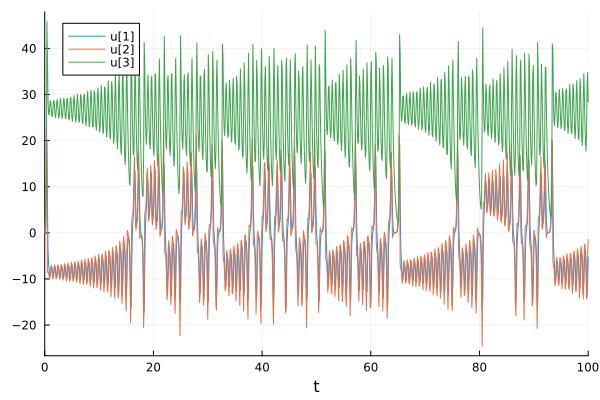

In [7]:
u0 = [1.0; 0.0; 0.0]
tspan = (0.0, 100.0)
dt = 0.1
prob = ODEProblem(lorenz, u0, tspan)
sol = solve(prob, Tsit5(), saveat = dt)
plot(sol)

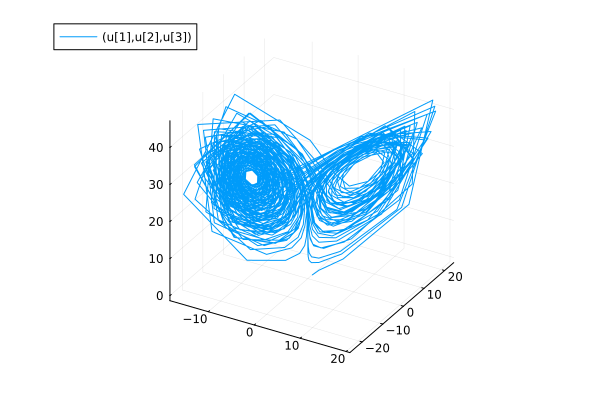

In [9]:
plot(sol, idxs = (1, 2, 3))

In [10]:
## Start the automatic discovery
ddprob = DataDrivenProblem(sol)

@variables t x(t) y(t) z(t)
u = [x; y; z]
basis = Basis(polynomial_basis(u, 5), u, iv = t)

Model ##Basis#234:
Equations (56):
  56 standard: see equations(##Basis#234)
Unknowns (3): see unknowns(##Basis#234)
  x(t)
  y(t)
  z(t)

In [11]:
opt = STLSQ(exp10.(-5:0.1:-1))
ddsol = solve(ddprob, basis, opt, options = DataDrivenCommonOptions(digits = 1))

"DataDrivenSolution{Float64}"

In [12]:
get_basis(ddsol)

Model ##Basis#237:
Equations (3):
  3 standard: see equations(##Basis#237)
Unknowns (3): see unknowns(##Basis#237)
  x(t)
  y(t)
  z(t)
Parameters (7): see parameters(##Basis#237)
  p₁
  p₂
  p₃
  p₄
  p₅
  p₆
  ⋮

In [13]:
ddsol.prob.p

7-element Vector{Float64}:
 -10.0
   9.9
  27.9
  -0.9
  -0.9
   1.0
  -2.6